In [1]:
## PRELIMINARIES ##
%load_ext autoreload
%autoreload 2

from IPython.display import HTML
from IPython.display import Javascript
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
# Python imports
import sys
sys.path.append('../')
import glob

In [14]:
from rankutils.utilities import getbasename, read_and_convert, makeDlabel
from rankutils.rIO import read_rank
from rankutils.drawing import colors_from_cmap, rank_plot
from rankutils.statistical import ev_fit, ev_density_approximation, ev_values, MAD_outlier

In [4]:
# Other imports
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3

In [5]:
import matlab.engine
matlab_engine = matlab.engine.start_matlab()

In [6]:
rankfpath = '/home/alberto/phD/projects/performance_prediction/ret-mr-learning/input-ranks/2x5-fold/places365/desc1-vgg16-DEEPFV/00464_bazaar_indoor_00000658.jpg.rk'
rankfname = getbasename(rankfpath)
k = 10

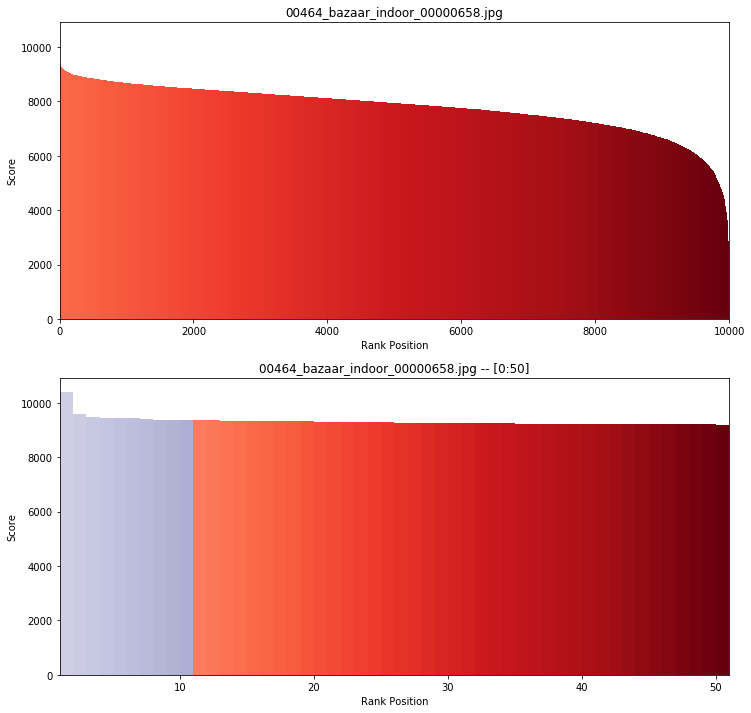

In [8]:
scores, names, bounds = read_and_convert(rankfpath, convert=True) # Dissimilarity -> Similarity

fig, axes = plt.subplots(2)
ax0, ax1 = axes
fig.set_size_inches(12, 12)

rank_plot(scores, k, ax=ax0, title=rankfname)
rank_plot(scores, k, ax=ax1, title="{0:s} -- [0:50]".format(rankfname), 
          **dict(limit=50, cmapnormbot=0.3))


First:  8649
Last:  8998
Num:  (86,)


/home/alberto/miniconda3/envs/albpy/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


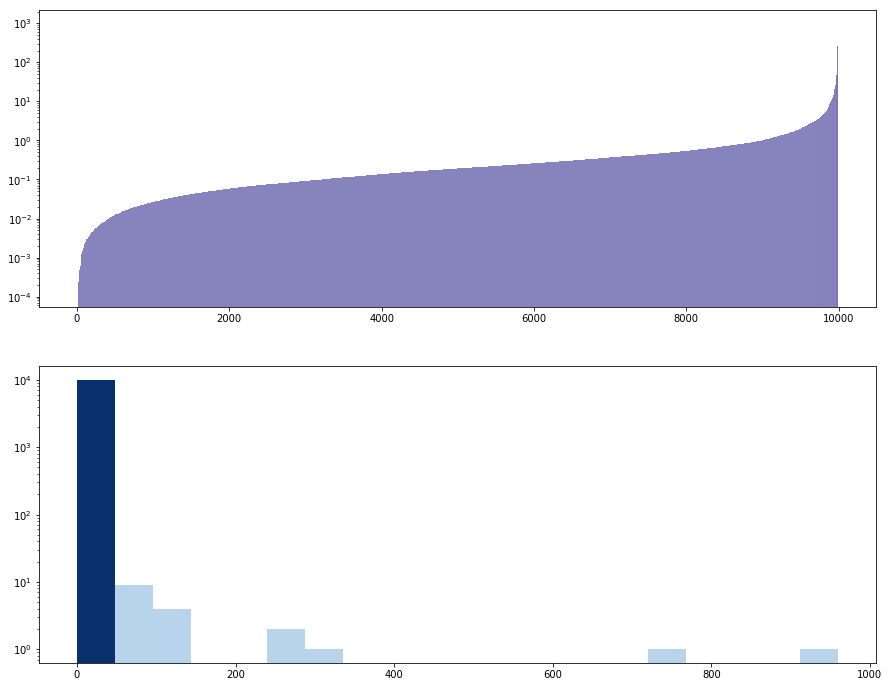

In [29]:
tail = scores[10:]

diffs = tail[:-1] - tail[1:]
colors = colors_from_cmap('Purples', diffs, 0.6, 1.0)

#ol = np.flatnonzero(MAD_outlier(diffs, t=50))
print("First: ", ol[0])
print("Last: ", ol[-1])
print("Num: ", ol.shape)

#diffs = diffs[ol[0]+1:ol[-1]]

dhist, dedges = np.histogram(diffs, bins=20, density=False)

fig, axes = plt.subplots(2)
ax0, ax1 = axes
fig.set_size_inches(15, 12)

ax0.bar(np.arange(diffs.size), np.sort(diffs), 1.0, 0.0, align='edge', color=colors)

ax0.set_yscale('log')

#ax0.set_ylim(bottom=0, top=(np.mean(diffs)*1.5))
#ax0.set_xlim(left=-10, right=diffs.size+10)

ax1.bar(dedges[0:-1], dhist, dedges[1]-dedges[0], 0.0, align='edge', 
        color=colors_from_cmap('Blues', dhist, 0.3, 1.0))

ax1.set_yscale('log')